# 网络生成

## 通用库引入

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

N = 30
direct_flag = True

## 设置随机种子

In [3]:
import numpy as np
rand_seed = 40

# for random results随机结果
# rand_seed = np.random.randint(0, high=2**32-1)

# Set the random seed for reproducibility
np.random.seed(rand_seed)

## 生成E-R网络

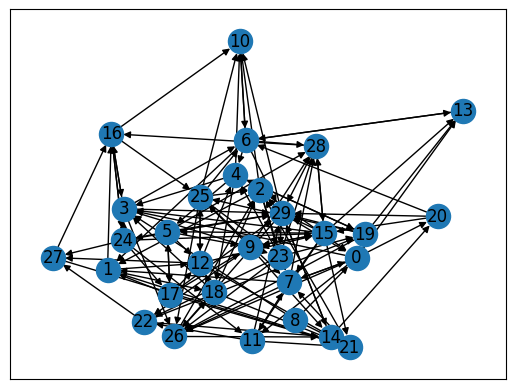

In [4]:
m = 2  # number of edges to attach from a new node to existing nodes
G = nx.erdos_renyi_graph(N, (2-(direct_flag != True)) *
                         m/N, directed=direct_flag, seed=rand_seed)
fig = plt.figure(1)
layout = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout)
plt.show('graph_ER.png')

In [5]:
# graph metrics
print(G.is_directed())

True


## 生成barabasi-albert网络

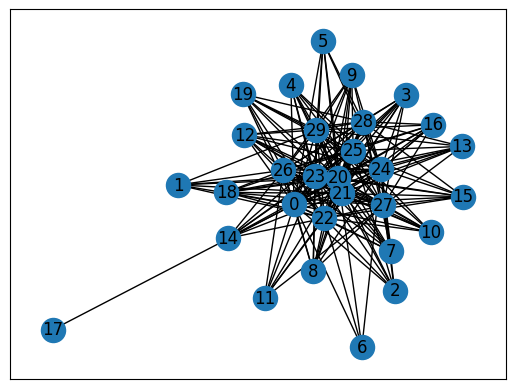

In [125]:
# 生成barabasi-albert网络
G = nx.barabasi_albert_graph(N, N-np.random.randint(0, N), seed=rand_seed)
fig = plt.figure(1)
layout = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout)
plt.show()

# domirank指标生成

## 计算sigma值

In [6]:
import drank as dr
GAdj = nx.to_scipy_sparse_array(G)
# 如果它是有向的（取决于链接的交互方式...）则翻转整个网络的方向
if direct_flag:
    GAdj = sp.sparse.csr_array(GAdj.T)
    
# 计算矩阵特征值
lambN = dr.find_eigenvaluen(GAdj, maxIter=500, dt=0.01, checkStep=25)
print(f'\nThe found smallest eigenvalue was: lambda_N = {lambN}')

sigma, sigmaArray = dr.optimal_sigman(GAdj, endVal=lambN)
print(f'\n The optimal sigma was found to be: {sigma}')

Current Interval : [-11.0, -1.0]
Current Interval : [-11.0, -1.2941176470588236]
Current Interval : [-2.3157894736842106, -1.2941176470588236]
Current Interval : [-2.3157894736842106, -1.4545454545454546]
Current Interval : [-2.3157894736842106, -1.6036446469248293]
Current Interval : [-2.3157894736842106, -1.7371992597162245]
Current Interval : [-2.3157894736842106, -1.8529363382135215]
Current Interval : [-2.3157894736842106, -1.9503917579325567]
Current Interval : [-2.3157894736842106, -2.0304870492006444]
Current Interval : [-2.1637742146557573, -2.0304870492006444]
Current Interval : [-2.1637742146557573, -2.062245311004853]
Current Interval : [-2.1637742146557573, -2.086723693194338]
Current Interval : [-2.1637742146557573, -2.1054672558176803]
Current Interval : [-2.1637742146557573, -2.1197473992259717]
Current Interval : [-2.1637742146557573, -2.130585277333497]
Current Interval : [-2.1637742146557573, -2.1387866942211047]
Current Interval : [-2.1512078957703844, -2.1387866942

In [7]:
# windows系统下的sigma求解
import drank as dr
GAdj = nx.to_scipy_sparse_array(G)
# 如果它是有向的（取决于链接的交互方式...）则翻转整个网络的方向
if direct_flag:
    GAdj = sp.sparse.csr_array(GAdj.T)
    
# 计算矩阵特征值
lambN = dr.find_eigenvaluen(GAdj, maxIter=500, dt=0.01, checkStep=25)
print(f'\nThe found smallest eigenvalue was: lambda_N = {lambN}')

if __name__ == '__main__':
    sigma, sigmaArray = dr.optimal_sigman(GAdj, endVal=lambN)
    print(f'\n The optimal sigma was found to be: {sigma}')

Current Interval : [-11.0, -1.0]
Current Interval : [-11.0, -1.2941176470588236]
Current Interval : [-2.3157894736842106, -1.2941176470588236]
Current Interval : [-2.3157894736842106, -1.4545454545454546]
Current Interval : [-2.3157894736842106, -1.6036446469248293]
Current Interval : [-2.3157894736842106, -1.7371992597162245]
Current Interval : [-2.3157894736842106, -1.8529363382135215]
Current Interval : [-2.3157894736842106, -1.9503917579325567]
Current Interval : [-2.3157894736842106, -2.0304870492006444]
Current Interval : [-2.1637742146557573, -2.0304870492006444]
Current Interval : [-2.1637742146557573, -2.062245311004853]
Current Interval : [-2.1637742146557573, -2.086723693194338]
Current Interval : [-2.1637742146557573, -2.1054672558176803]
Current Interval : [-2.1637742146557573, -2.1197473992259717]
Current Interval : [-2.1637742146557573, -2.130585277333497]
Current Interval : [-2.1637742146557573, -2.1387866942211047]
Current Interval : [-2.1512078957703844, -2.1387866942

## 递归算法

In [11]:
flag, ourDomiRankDistribution = dr.domirank_by_recursive(
    GAdj, sigma=sigma)

if flag:
    print(ourDomiRankDistribution)
else:
    print("Can not find recursive algorithm solve of Dominance rank distribution.")


[ 5.6894422e-01  1.4383676e+00  5.3428891e-03  1.9897995e+00
  1.4945105e+00  5.4251176e-01 -5.3468174e-01  7.6555026e-01
  2.3822074e-44  9.3229485e-01  1.1463244e+00  6.7817193e-01
  7.6077902e-01  1.4615878e+00 -2.9403883e-01 -7.0288077e-02
 -6.0634524e-01  2.5077948e-01 -9.1615863e-02  4.6629262e-01
  7.0632738e-01  1.9462137e+00  7.0918465e-01 -3.4252724e-01
  8.4501541e-01  1.0018926e+00  2.9091233e-01  2.8048080e-01
  1.9272946e+00  1.8395561e+00]


## 解析算法

In [12]:
analyticalDomiRankDistribution = dr.domirank_by_annalytical(
    GAdj, sigma=sigma)
print(analyticalDomiRankDistribution)

[ 0.56894667  1.43854436  0.00530832  1.98993252  1.4947257   0.54253212
 -0.53495922  0.76553169  0.          0.93240296  1.14642047  0.67820795
  0.76073511  1.4618188  -0.29413375 -0.07048657 -0.60662336  0.25071795
 -0.09176772  0.46625396  0.70636912  1.94633549  0.7091724  -0.34264453
  0.84513171  1.00200648  0.29085708  0.28045372  1.92751263  1.83960399]


# 网络可视化过程
1. 节点攻击对比
2. 网络绘制

## 节点攻击对比

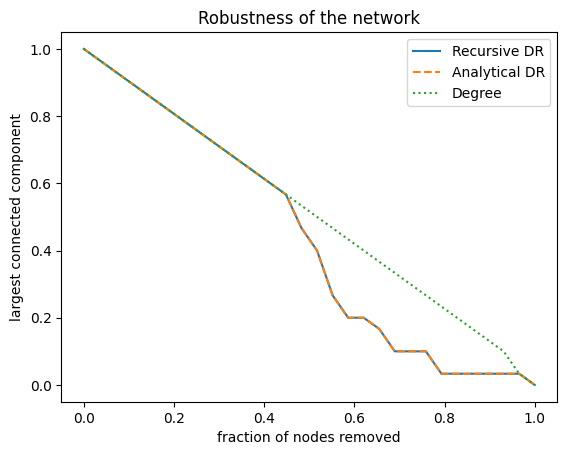

In [135]:
# generate the attack using the centrality (descending)
ourDomiRankAttack = dr.generate_attack(ourDomiRankDistribution)
analyticalDomiRankAttack = dr.generate_attack(analyticalDomiRankDistribution)
degreeAttack = dr.generate_attack(
    nx.degree_centrality(G))
# attack the network and get the largest connected component evolution
domiRankRobustness, domiRankLinks = dr.network_attack_sampled(
    GAdj, ourDomiRankAttack)
domiRankRobustnessAnalytical, domiRankLinksAnalytical = dr.network_attack_sampled(
    GAdj, analyticalDomiRankAttack)
degreeRobustness, degreeLinks = dr.network_attack_sampled(
    GAdj, degreeAttack)

# generating the plot
fig2 = plt.figure(2)
ourRangeNew = np.linspace(0, 1, domiRankRobustness.shape[0])
plt.title('Robustness of the network')
plt.plot(ourRangeNew, domiRankRobustness, label='Recursive DR')
plt.plot(ourRangeNew, domiRankRobustnessAnalytical,
         label='Analytical DR', linestyle='--')
plt.plot(ourRangeNew, degreeRobustness, label='Degree', linestyle=':')
plt.legend()
plt.xlabel('fraction of nodes removed')
plt.ylabel('largest connected component')
plt.show()

## 寻找sigma过程

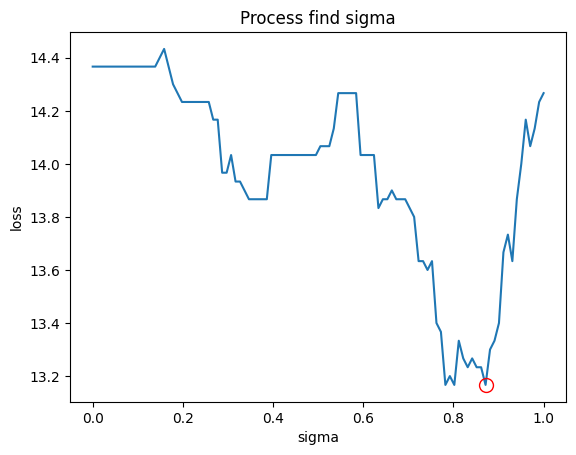

In [136]:
fig1 = plt.figure(1)
ourRange = np.linspace(0, 1, sigmaArray.shape[0])
index = np.where(sigmaArray == sigmaArray.min())[0][-1]

plt.plot(ourRange, sigmaArray)
plt.plot(ourRange[index], sigmaArray[index], 'ro', mfc='none', markersize=10)
plt.xlabel('sigma')
plt.ylabel('loss')
plt.title('Process find sigma')
plt.show()